In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/p21v29_KMP_csv.csv', index_col=["pid"], encoding='ISO-8859-1', low_memory=False)


In [179]:
# rename 함수 사용해서 칼럼명 변경
df = df.rename(columns={
    'p21gender': 'sex',
    'p21age1': 'age',
    'p21d30001': 'call_time_mins',
    'p21c02003': 'combined',
    'p21c02001': 'who_pay_fee',
    'p21a03002': 'phone_type',
    'p21a03008': 'mobile_carrier',
    'p21a03024': 'voice_unlimited',
    'p21a03026': 'data_unlimited',
    'p21a03014': 'welfare_discount',
    'p21a03038': 'phone_period',
    'p21a03028': 'phone_manufacturer',
    'p21l01001': 'tablet',
    'p21j01001': 'wearable',
    'p21mar': 'marriage',
    'p21income': 'income',
    'p21job1': 'job',
    'p21d26039': 'ott_week_spend_min',
    'p21d26043': 'ott_weekend_spend_min',
    'p21d11010':'sns_week_spend_min',
    'p21d11014':'sns_weekend_spend_min',
    'p21c01001': 'monthly_expense',
})

In [180]:
# # 남기고자 하는 칼럼 목록
# columns_to_keep = [
#     'sex', 'age', 'call_time_mins', 'combined', 'who_pay_fee',
#     'phone_type', 'mobile_carrier', 'voice_unlimited', 'data_unlimited',
#     'welfare_discount', 'phone_period', 'phone_manufacturer', 'tablet', 'wearable',
#    'marriage', 'income', 'job',
#     'ott_week_spend_min', 'ott_weekend_spend_min', 'sns_week_spend_min',
#     'sns_weekend_spend_min', 'monthly_expense'
# ]
# 
# # 필요한 칼럼만 선택
# df = df[columns_to_keep]
# 
# # 변경된 칼럼명 확인
# print(df.columns)

In [181]:
# # 모든 object 타입 열을 int로 변환 시도

columns_to_drop = []  # 제거할 열 이름 저장

for col in df.select_dtypes(include=['object']).columns:
    try:
        # 숫자로 변환 시도 (결측 허용하는 Int64 타입으로 변환)
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
    except Exception:
        # 변환 불가능한 열을 기록
        columns_to_drop.append(col)

# 변환되지 않은 열 제거
df = df.drop(columns=columns_to_drop)

# 변환 결과 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10154 entries, 10001 to 118330001
Columns: 510 entries, hid to p21h01010
dtypes: Int64(373), float64(1), int64(136)
memory usage: 43.2 MB
None


#### 여기서 변수값 필터링

In [182]:
# df = df[df['age'] >= 65]
df = df[df['monthly_expense'] > 0]

#### NULL 확인 및 제거

In [183]:
#결측치 확인
df.isnull().sum()

#널값은 사용 안 하는 경우라 판단해서 일단 0으로 대체
df = df.fillna(0)

#### 상관관계 분석

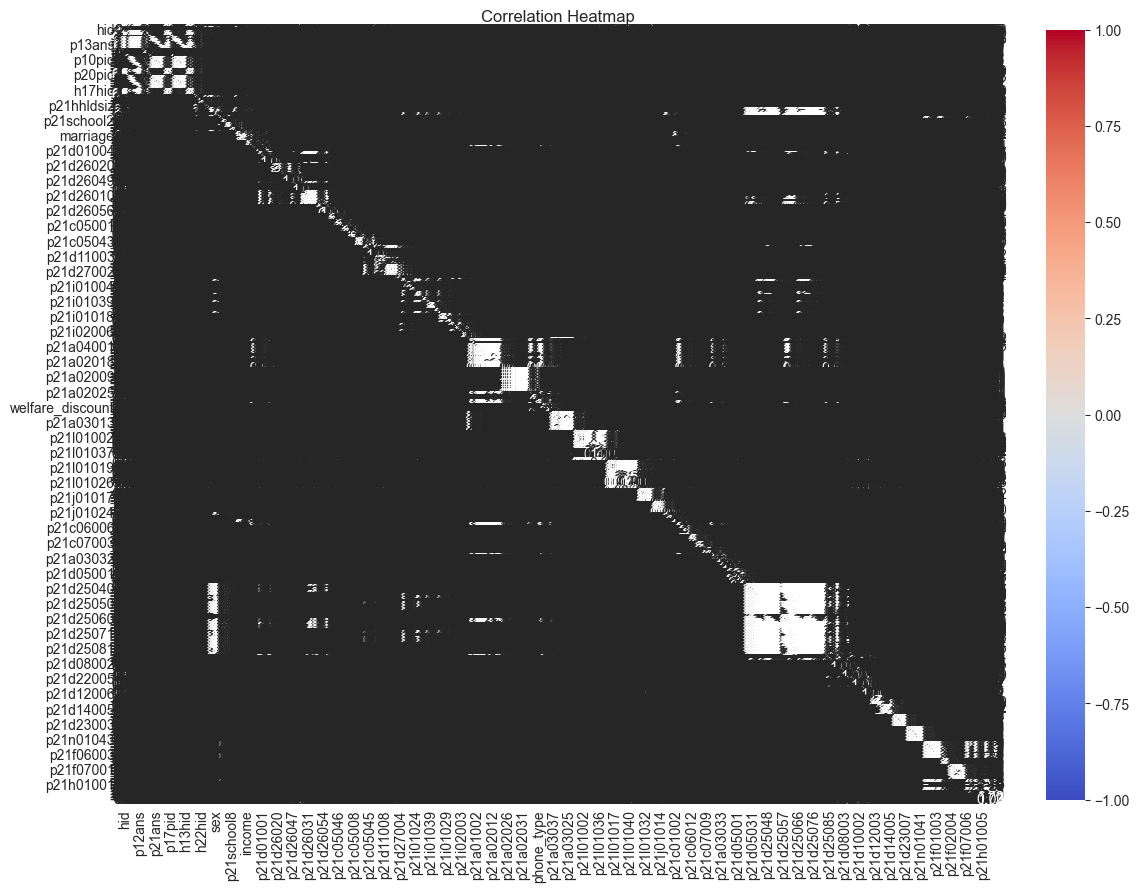

In [187]:
# 상관관계 분석
correlation_matrix = df.corr()

# 상관관계 히트맵 생성
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

#### 상관관계 가장 높은 항목 추출

In [186]:
# monthly_expense와의 상관관계가 가장 높은 10개 항목 추출
correlation_with_monthly_expense = df.corr()['monthly_expense'].drop('monthly_expense')
top_10_correlations = correlation_with_monthly_expense.abs().sort_values(ascending=False).head(20)

# 상관관계 계수와 함께 열 이름 출력
top_10_correlations_with_sign = df.corr()['monthly_expense'][top_10_correlations.index]
print(top_10_correlations_with_sign)

p21c01002     0.980990
p21school1    0.533194
p21school     0.532731
phone_type    0.517906
p21d25072     0.515499
p21d25048     0.510298
p21d25073     0.499215
p21d25049     0.497151
p21d25074     0.473108
p21d25050     0.466942
p21d25077     0.464555
p21d25075     0.464272
p21d25053     0.460982
p21d25076     0.460841
p21d25052     0.460219
p21d25051     0.455005
p21d25078     0.454844
p21d25079     0.449394
p21d25067     0.446454
p21d25054     0.446438
Name: monthly_expense, dtype: float64


In [163]:
# monthly_expense와의 상관관계가 높은 상위 10개 컬럼 목록 생성
top_10_columns = top_10_correlations.index.tolist()

# monthly_expense 컬럼을 포함하여 새로운 컬럼 목록 생성
columns_to_include = top_10_columns + ['monthly_expense']

# df에서 해당 컬럼들만 선택하여 새로운 데이터프레임 생성
df_top10 = df[columns_to_include]

# 결과 확인
df_top10

,phone_type,welfare_discount,income,job,age,who_pay_fee,ott_week_spend_min,ott_weekend_spend_min,sns_week_spend_min,marriage,...,wearable,sex,combined,mobile_carrier,tablet,call_time_mins,data_unlimited,voice_unlimited,phone_period,monthly_expense
pid,,,,,,,,,,,,,,,,,,,,,
10001,3,2,7,1,54,4,90,90,20,2,...,2,1,1,2,2,0,2,1,21,32
10002,3,2,1,2,49,4,120,180,30,2,...,2,2,1,2,2,0,2,1,21,32
10003,3,2,5,1,25,1,60,120,60,1,...,1,2,1,2,2,0,2,1,34,29
10004,4,2,1,2,21,1,120,180,30,1,...,1,1,2,3,1,120,2,1,9,40
20001,4,2,6,1,56,1,60,180,10,2,...,2,1,1,1,2,0,2,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300001,2,2,5,1,26,1,180,300,60,1,...,2,1,1,3,2,0,1,1,12,70
118300002,2,2,1,2,53,1,0,0,0,3,...,2,2,1,2,2,0,2,2,24,39
118310001,2,2,2,2,82,1,0,0,0,3,...,2,2,2,1,2,0,2,2,17,33


### KNN 모델

In [116]:
# Input 변수(X)와 Output 변수(y) 구분
X = np.array(df_top10.iloc[:,:-1])
y = np.array(df_top10['monthly_expense'])

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 파이프라인 설정
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 데이터 스케일링
    ('poly', PolynomialFeatures()),  # 다항식 특성 추가
    ('model', KNeighborsRegressor())  # KNN 회귀 사용
])

# 그리드 서치를 통한 하이퍼파라미터 튜닝
param_grid = {
    'poly__degree': [1, 2, 3],  # 다항식 차수 선택
    'model__n_neighbors': [3, 5, 7, 9, 11],  # KNN 이웃 수
    'model__weights': ['uniform', 'distance']  # 가중치 방법
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 최적 모델 적용
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

# 허용 오차 기준으로 정확도 계산
tolerance = 0.1 * np.mean(y_test)  # 허용 오차: 실제 값의 10%
accurate_predictions = np.abs(y_pred - y_test) <= tolerance
accuracy = np.mean(accurate_predictions)

print("최적 모델:", grid_search.best_params_)
print("MAE : %.2f" % mae)
print("MSE : %.2f" % mse)
print("RMSE : %.2f" % rmse)
print("R2 : %.2f" % r2)
print("Accuracy : %.2f" % accuracy)

최적 모델: {'model__n_neighbors': 11, 'model__weights': 'distance', 'poly__degree': 1}
MAE : 10.69
MSE : 215.62
RMSE : 14.68
R2 : 0.46
Accuracy : 0.29
